In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-stock-price-dataset/Apple Dataset.csv


In [2]:
# Import Dataset
apple_data=pd.read_csv('/kaggle/input/apple-stock-price-dataset/Apple Dataset.csv')

               Open          High           Low         Close     Adj Close  \
count  10954.000000  10954.000000  10954.000000  10954.000000  10954.000000   
mean      21.530877     21.761904     21.308220     21.544072     20.747506   
std       44.458386     44.931856     44.013578     44.492483     44.038943   
min        0.049665      0.049665      0.049107      0.049107      0.037900   
25%        0.296875      0.303571      0.290179      0.296875      0.241624   
50%        0.522321      0.533482      0.513393      0.524554      0.427333   
75%       19.767500     19.888572     19.457768     19.682679     17.048054   
max      198.020004    199.619995    197.000000    198.110001    197.589523   

             Volume  
count  1.095400e+04  
mean   3.190792e+08  
std    3.357446e+08  
min    0.000000e+00  
25%    1.139936e+08  
50%    2.067128e+08  
75%    3.993444e+08  
max    7.421641e+09  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0


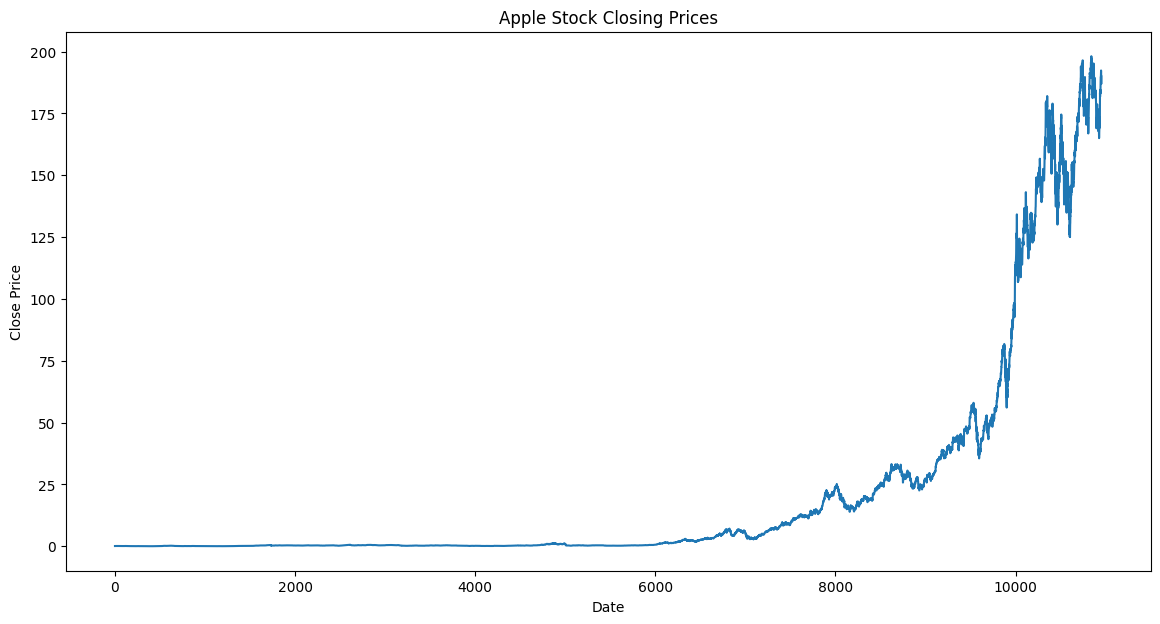

In [3]:
# Display basic statistics
print(apple_data.describe())

# Check for missing values
print(apple_data.isnull().sum())

# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(apple_data['Close'])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# check stationarity

In [4]:
result_adf = adfuller(apple_data['Close'])
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')

ADF Statistic: 2.912167161139432
p-value: 1.0


In [5]:
apple_data["return"] = np.log(apple_data["Adj Close"]).diff(1)

In [6]:
apple_data

,Date,Open,High,Low,Close,Adj Close,Volume,return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,-0.053582
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,-0.076227
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,0.024446
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,0.028583
...,...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300,0.006143
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400,0.006834
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500,-0.007567
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900,-0.021283


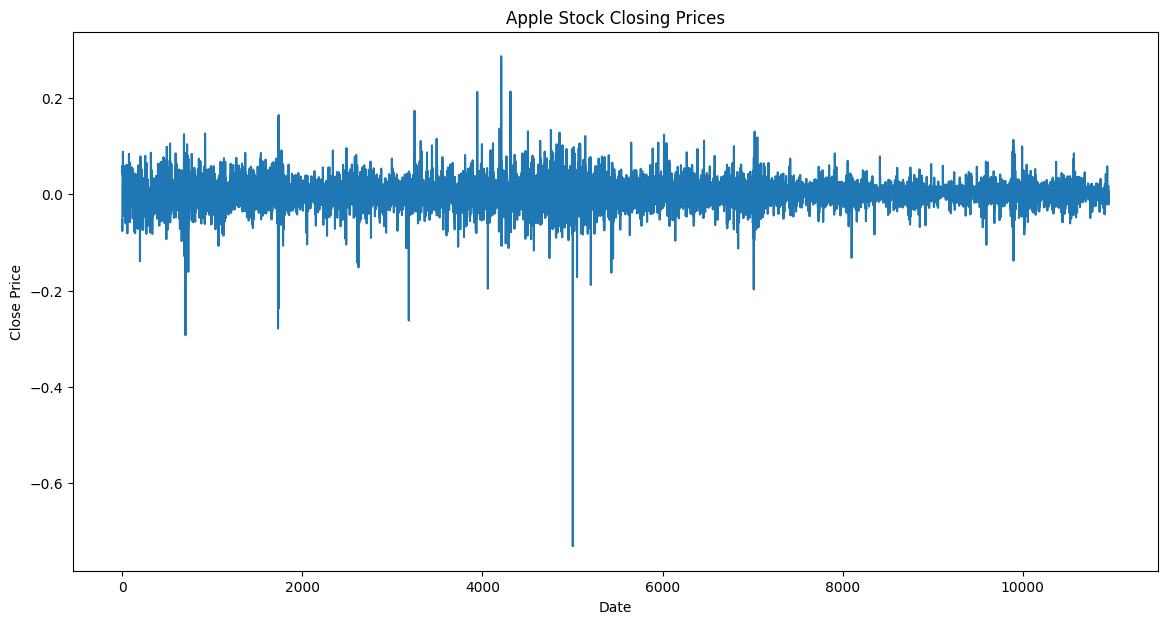

In [7]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(apple_data['return'])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [8]:
# Perform the ADF test on the differenced data
result_adf_diff = adfuller(apple_data['return'].dropna())
print(f'\nADF Statistic (Differenced Data): {result_adf_diff[0]}')
print(f'p-value (Differenced Data): {result_adf_diff[1]}')


ADF Statistic (Differenced Data): -26.71387278392545
p-value (Differenced Data): 0.0


# check white noise

In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox

result = acorr_ljungbox(apple_data['return'].dropna(), lags=20)

result

,lb_stat,lb_pvalue
1,2.789214,0.094901
2,7.376095,0.025021
3,17.241287,0.000630
4,24.546232,0.000062
5,24.958688,0.000142
6,26.182229,0.000206
7,26.184587,0.000467
8,26.435012,0.000885
9,27.099771,0.001347
10,33.052157,0.000267


In [6]:
apple_data.dropna().drop(["Date"], axis=1)

,Open,High,Low,Close,Adj Close,Volume
0,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...
10949,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


# determine model hyperparameters

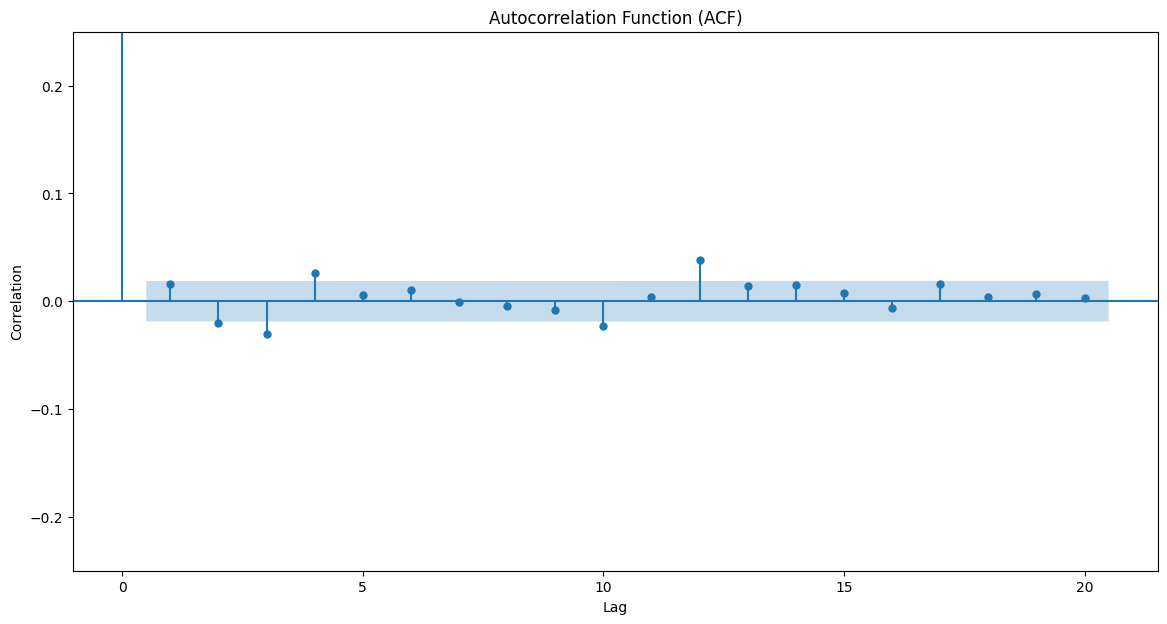

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(14, 7))
plot_acf(apple_data['return'].dropna(), ax=ax, lags=20, alpha=0.05)
ax.set_ylim([-0.25, 0.25])
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

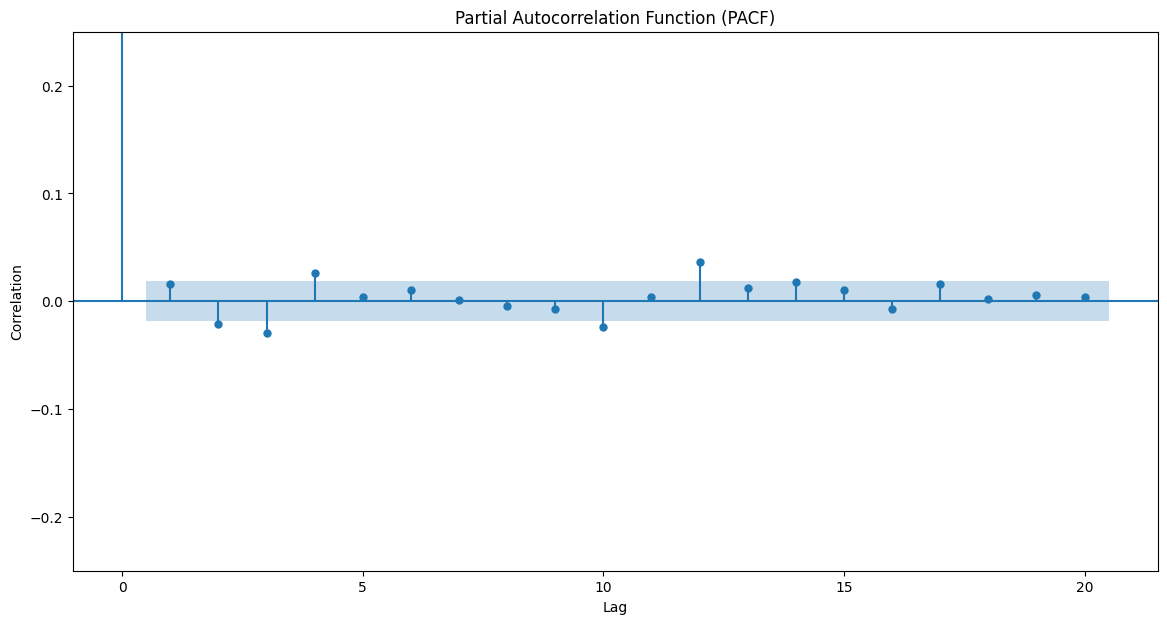

In [14]:
fig, ax = plt.subplots(figsize=(14, 7))
plot_pacf(apple_data['return'].dropna(), ax=ax, lags=20, alpha=0.05)
ax.set_ylim([-0.25, 0.25])
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

ARIMA(0, 0, 0) RMSE=0.018200007560643737
ARIMA(0, 0, 1) RMSE=0.018199796587527496
ARIMA(0, 0, 2) RMSE=0.018199748847438628
ARIMA(0, 0, 3) RMSE=0.01820002955619614
ARIMA(0, 0, 4) RMSE=0.01820009888183398
ARIMA(1, 0, 0) RMSE=0.018199752587999874
ARIMA(1, 0, 1) RMSE=0.018199820964843304
ARIMA(1, 0, 2) RMSE=0.018199740217207844
ARIMA(1, 0, 3) RMSE=0.01819994794912761
ARIMA(1, 0, 4) RMSE=0.018200079695964676
ARIMA(2, 0, 0) RMSE=0.01819975665310822
ARIMA(2, 0, 1) RMSE=0.01819978104355702
ARIMA(2, 0, 2) RMSE=0.018199911557687555
ARIMA(2, 0, 3) RMSE=0.018200041936897615
ARIMA(2, 0, 4) RMSE=0.018199946043254
ARIMA(3, 0, 0) RMSE=0.018200028387297184
ARIMA(3, 0, 1) RMSE=0.01820003014342104
ARIMA(3, 0, 2) RMSE=0.018200056306926497
ARIMA(3, 0, 3) RMSE=0.01820014950326298
ARIMA(3, 0, 4) RMSE=0.01819990183317283
ARIMA(4, 0, 0) RMSE=0.01820011975929261
ARIMA(4, 0, 1) RMSE=0.01820011551506876
ARIMA(4, 0, 2) RMSE=0.018200135923471236
ARIMA(4, 0, 3) RMSE=0.018199910995887865
ARIMA(4, 0, 4) RMSE=0.0181996

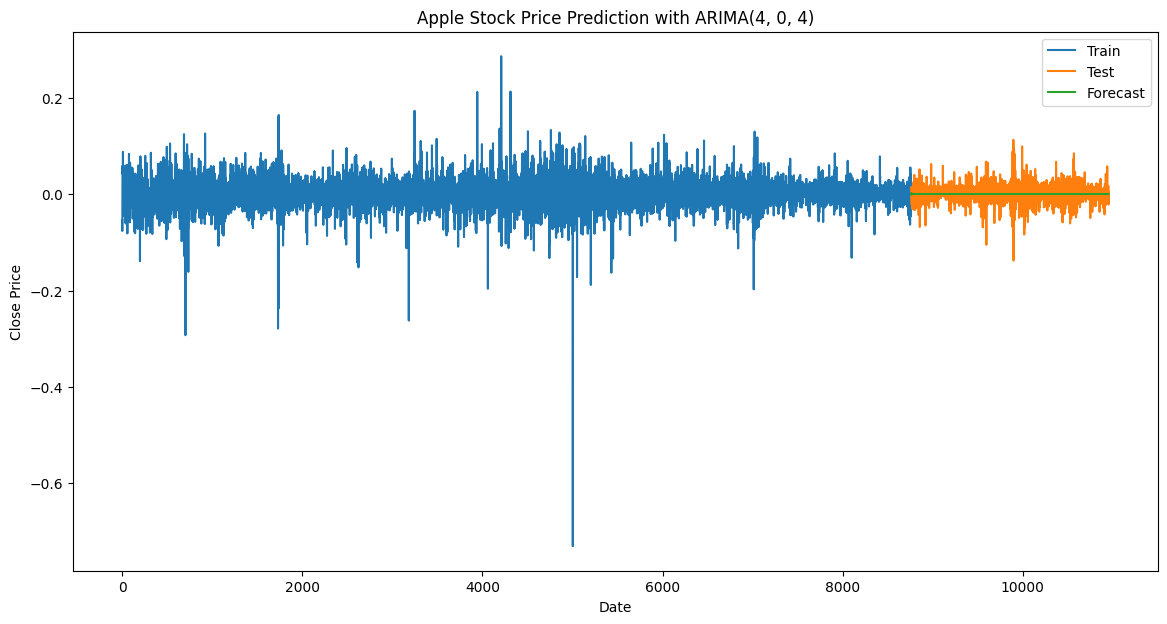

Best ARIMA Configuration: (4, 0, 4)
Root Mean Squared Error: 0.018199640687289468


In [15]:
# Split data into training and testing sets
train = apple_data['return'][:int(0.8*len(apple_data))]
test = apple_data['return'][int(0.8*len(apple_data)):]

# Evaluate ARIMA models with different configurations
p_values = [0, 1, 2, 3, 4]
d_values = [0]  # Differencing already done
q_values = [0, 1, 2, 3, 4]

best_score, best_cfg, best_forecast = float("inf"), None, None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train, order=(p,d,q))
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=len(test))
                mse = mean_squared_error(test, forecast)
                rmse = np.sqrt(mse)
                if rmse < best_score:
                    best_score, best_cfg, best_forecast = rmse, (p,d,q), forecast
                print(f'ARIMA{(p,d,q)} RMSE={rmse}')
            except:
                continue

# Plotting the best model's forecast
forecast_index = test.index
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_index, best_forecast, label='Forecast')
plt.title(f'Apple Stock Price Prediction with ARIMA{best_cfg}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Display the best RMSE and configuration
print(f'Best ARIMA Configuration: {best_cfg}')
print(f'Root Mean Squared Error: {best_score}')

In [32]:
from statsmodels.tsa.stattools import arma_order_select_ic

arma_order_select_ic(train, max_ar=4, max_ma=4, ic=["aic", "bic"])

{'aic':               0             1             2             3             4
 0 -36372.880810 -36376.203605 -36377.821137 -36384.878484 -36389.855306
 1 -36375.988364 -36372.251466 -36374.868774 -36388.049536 -36387.790423
 2 -36378.648760 -36376.501878 -36381.373470 -36385.992634 -36386.816020
 3 -36384.723481 -36382.905392 -36386.662353 -36385.832986 -36388.290362
 4 -36390.233359 -36388.228191 -36386.308065 -36387.957064 -36387.335628,
 'bic':               0             1             2             3             4
 0 -36358.724222 -36354.968725 -36349.507963 -36349.487016 -36347.385545
 1 -36354.753483 -36343.938291 -36339.477306 -36345.579774 -36338.242368
 2 -36350.335586 -36341.110410 -36338.903708 -36336.444579 -36330.189672
 3 -36349.332013 -36340.435631 -36337.114298 -36329.206637 -36324.585720
 4 -36347.763597 -36338.680136 -36329.681716 -36324.252421 -36316.552692,
 'aic_min_order': (4, 0),
 'bic_min_order': (0, 0)}

# Training Model

In [16]:
model = ARIMA(np.log(apple_data["Adj Close"]), order=(4,1,4))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                10954
Model:                 ARIMA(4, 1, 4)   Log Likelihood               23501.444
Date:                Wed, 12 Jun 2024   AIC                         -46984.889
Time:                        15:59:34   BIC                         -46919.176
Sample:                             0   HQIC                        -46962.746
                              - 10954                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1856      0.149      1.246      0.213      -0.106       0.478
ar.L2         -0.0040      0.142     -0.028      0.977      -0.282       0.274
ar.L3         -0.2804      0.124     -2.270      0.023      -0.523      -0.038
ar.L4         -0.3166      0.125     -2.536      0.011      -0.561      -0.072
ma.L1         -0.1692      0.147     -1.151      0.250      -0.457       0.119
ma.L2         -0.0201      0.140     -0.144      0.886      -0.295       0.255
ma.L3          0.2561      0.121      2.110      0.035       0.018       0.494
ma.L4          0.3583      0.121      2.961      0.003       0.121       0.595
sigma2         0.0008   3.02e-06    265.471      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1080578.71
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -1.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
y_pred = model_fit.predict(0, len(apple_data["Adj Close"])-1)

# 计算 R-squared
from sklearn.metrics import r2_score
r2 = r2_score(np.log(apple_data["Adj Close"]), y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.9998


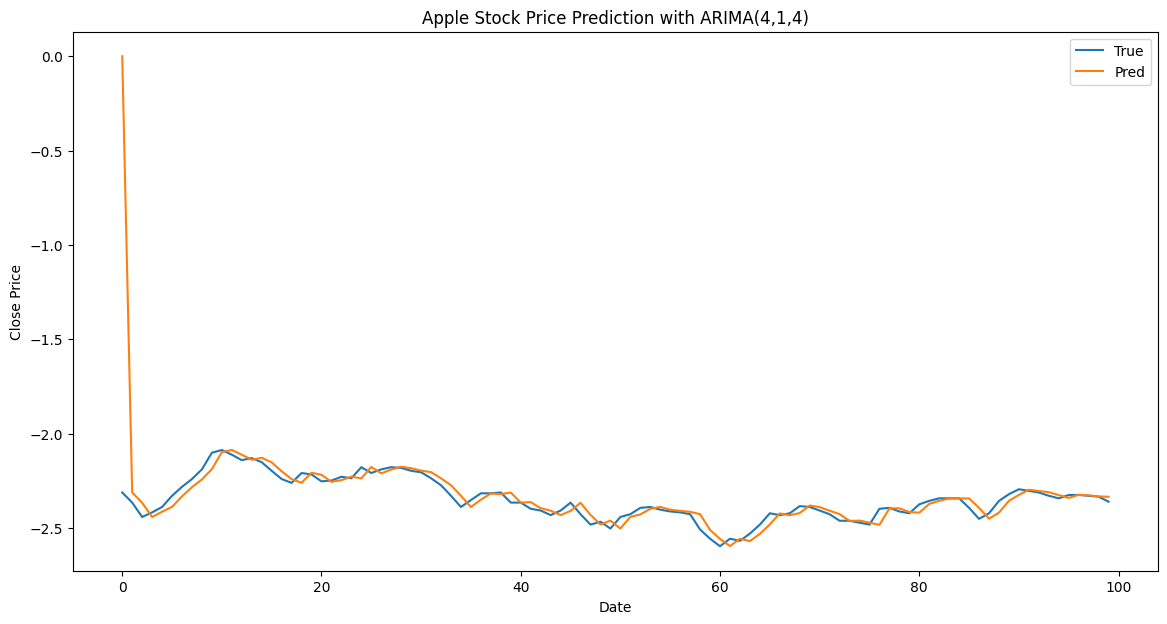

In [18]:
# Plotting the best model's forecast
plt.figure(figsize=(14, 7))
plt.plot(np.log(apple_data["Adj Close"]).iloc[:100], label='True')
plt.plot(y_pred.iloc[:100], label='Pred')
# plt.plot(forecast_index, best_forecast, label='Forecast')
plt.title(f'Apple Stock Price Prediction with ARIMA(4,1,4)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [19]:
res = acorr_ljungbox(model_fit.resid[1:], lags=20)
res

,lb_stat,lb_pvalue
1,0.003645,0.951859
2,0.032479,0.983891
3,0.046198,0.997395
4,0.296533,0.990037
5,0.300075,0.997642
6,0.640003,0.995696
7,0.872177,0.996636
8,1.162525,0.996998
9,1.205662,0.998799
10,3.604690,0.963424


In [20]:
res = acorr_ljungbox(np.square(model_fit.resid[1:]), lags=20)
res

,lb_stat,lb_pvalue
1,12.033960,5.223997e-04
2,27.584089,1.023744e-06
3,33.603868,2.401809e-07
4,36.973961,1.823690e-07
5,47.093318,5.437949e-09
6,50.950872,3.029941e-09
7,51.946927,5.980879e-09
8,55.532858,3.477824e-09
9,58.950570,2.134658e-09
10,63.710458,7.147672e-10


In [12]:
# Split data into training and testing sets
apple_data["log_close"] = np.log(apple_data["Adj Close"])
train = apple_data['log_close'][:int(0.99*len(apple_data))]
test = apple_data['log_close'][int(0.99*len(apple_data)):]

forecast_series = []
for i in range(len(test)):
    print("Round: ", i+1)
    model = ARIMA(apple_data["log_close"].iloc[i:(len(train)+i)], order=(4,1,4))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1).iloc[0]
    forecast_series.append(forecast)
    
forecast_series = pd.Series(forecast_series)
forecast_series
    
    

Round:  1
Round:  2
Round:  3
Round:  4
Round:  5
Round:  6
Round:  7
Round:  8
Round:  9
Round:  10
Round:  11
Round:  12
Round:  13
Round:  14
Round:  15
Round:  16
Round:  17
Round:  18
Round:  19
Round:  20
Round:  21
Round:  22
Round:  23
Round:  24
Round:  25
Round:  26
Round:  27
Round:  28
Round:  29
Round:  30
Round:  31
Round:  32
Round:  33
Round:  34
Round:  35
Round:  36
Round:  37
Round:  38
Round:  39
Round:  40
Round:  41
Round:  42
Round:  43
Round:  44
Round:  45
Round:  46
Round:  47
Round:  48
Round:  49
Round:  50
Round:  51
Round:  52
Round:  53
Round:  54
Round:  55
Round:  56
Round:  57
Round:  58
Round:  59
Round:  60
Round:  61
Round:  62
Round:  63
Round:  64
Round:  65
Round:  66
Round:  67
Round:  68
Round:  69
Round:  70
Round:  71
Round:  72
Round:  73
Round:  74
Round:  75
Round:  76
Round:  77
Round:  78
Round:  79
Round:  80
Round:  81
Round:  82
Round:  83
Round:  84
Round:  85
Round:  86
Round:  87
Round:  88
Round:  89
Round:  90
Round:  91
Round:  

0      5.283391
1      5.275046
2      5.280696
3      5.269768
4      5.268588
         ...   
105    5.246126
106    5.253416
107    5.259925
108    5.251822
109    5.230388
Length: 110, dtype: float64

In [77]:
test 

10844    5.274923
10845    5.280268
10846    5.269497
10847    5.268726
10848    5.263164
           ...   
10949    5.252483
10950    5.259317
10951    5.251750
10952    5.230467
10953    5.246919
Name: log_close, Length: 110, dtype: float64

In [13]:
forecast_all = pd.concat([train, forecast_series]).copy()
forecast_all

0     -2.312050
1     -2.365631
2     -2.441859
3     -2.417413
4     -2.388829
         ...   
105    5.246126
106    5.253416
107    5.259925
108    5.251822
109    5.230388
Length: 10954, dtype: float64

In [14]:
original_all = apple_data['log_close'].copy()
original_all

0       -2.312050
1       -2.365631
2       -2.441859
3       -2.417413
4       -2.388829
           ...   
10949    5.252483
10950    5.259317
10951    5.251750
10952    5.230467
10953    5.246919
Name: log_close, Length: 10954, dtype: float64

In [15]:
forecast_all = forecast_all.reset_index(drop=True)

In [79]:
test.index[0]

10844

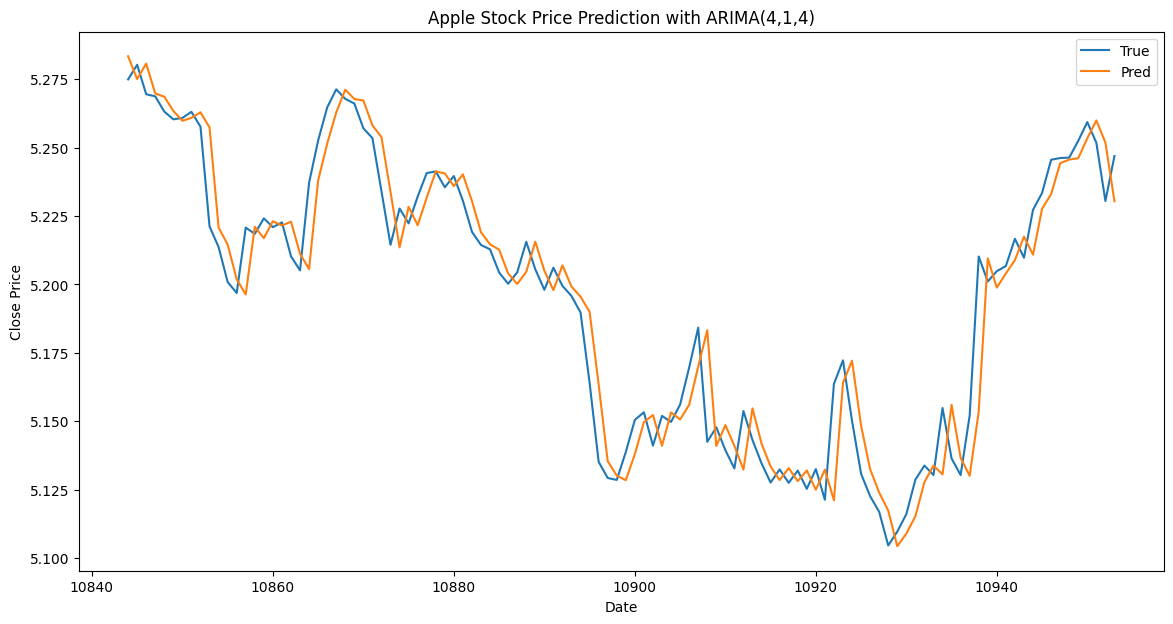

In [18]:
# Plotting the best model's forecast
forecast_index = test.index
plt.figure(figsize=(14, 7))
plt.plot(original_all.iloc[test.index[0]:], label='True')
plt.plot(forecast_all.iloc[test.index[0]:], label='Pred')
# plt.plot(forecast_index, best_forecast, label='Forecast')
plt.title(f'Apple Stock Price Prediction with ARIMA(4,1,4)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# # Display the best RMSE and configuration
# print(f'Best ARIMA Configuration: {best_cfg}')
# print(f'Root Mean Squared Error: {best_score}')

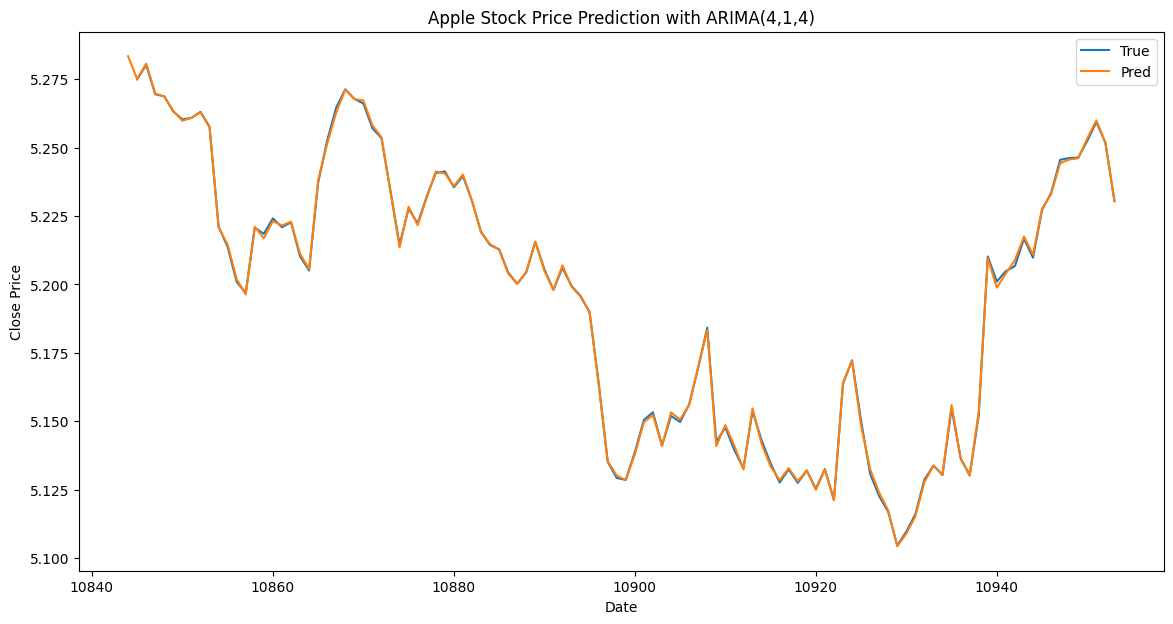

In [23]:
# Plotting the best model's forecast
forecast_index = test.index
plt.figure(figsize=(14, 7))
plt.plot(original_all.iloc[test.index[0]:].shift(periods=1), label='True')
plt.plot(forecast_all.iloc[test.index[0]:], label='Pred')
# plt.plot(forecast_index, best_forecast, label='Forecast')
plt.title(f'Apple Stock Price Prediction with ARIMA(4,1,4)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [21]:
forecast_all = pd.concat([train, best_forecast]).copy()
forecast_all

0             NaN
1       -0.053582
2       -0.076227
3        0.024446
4        0.028583
           ...   
10949    0.000981
10950    0.000981
10951    0.000981
10952    0.000981
10953    0.000981
Length: 10954, dtype: float64

In [27]:
apple_data["return"] = apple_data["Adj Close"].pct_change()
original_all = apple_data['return'].copy()

In [28]:
original_all[0] = apple_data["Adj Close"].iloc[0]-1
original_all

0       -0.900942
1       -0.052171
2       -0.073394
3        0.024747
4        0.028995
           ...   
10949    0.006162
10950    0.006857
10951   -0.007538
10952   -0.021058
10953    0.016588
Name: return, Length: 10954, dtype: float64

In [29]:
original_all += 1
original_all

0        0.099058
1        0.947829
2        0.926606
3        1.024747
4        1.028995
           ...   
10949    1.006162
10950    1.006857
10951    0.992462
10952    0.978942
10953    1.016588
Name: return, Length: 10954, dtype: float64

In [30]:
original_all.cumprod()

0          0.099058
1          0.093890
2          0.086999
3          0.089152
4          0.091737
            ...    
10949    191.039993
10950    192.350006
10951    190.899994
10952    186.880005
10953    189.979996
Name: return, Length: 10954, dtype: float64

In [25]:
original_all[0] = apple_data["Adj Close"].iloc[0]-1
forecast_all[0] = apple_data["Adj Close"].iloc[0]-1
original_all += 1
forecast_all += 1

In [23]:
apple_data

,Date,Open,High,Low,Close,Adj Close,Volume,return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,-0.053582
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,-0.076227
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,0.024446
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,0.028583
...,...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300,0.006143
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400,0.006834
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500,-0.007567
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900,-0.021283


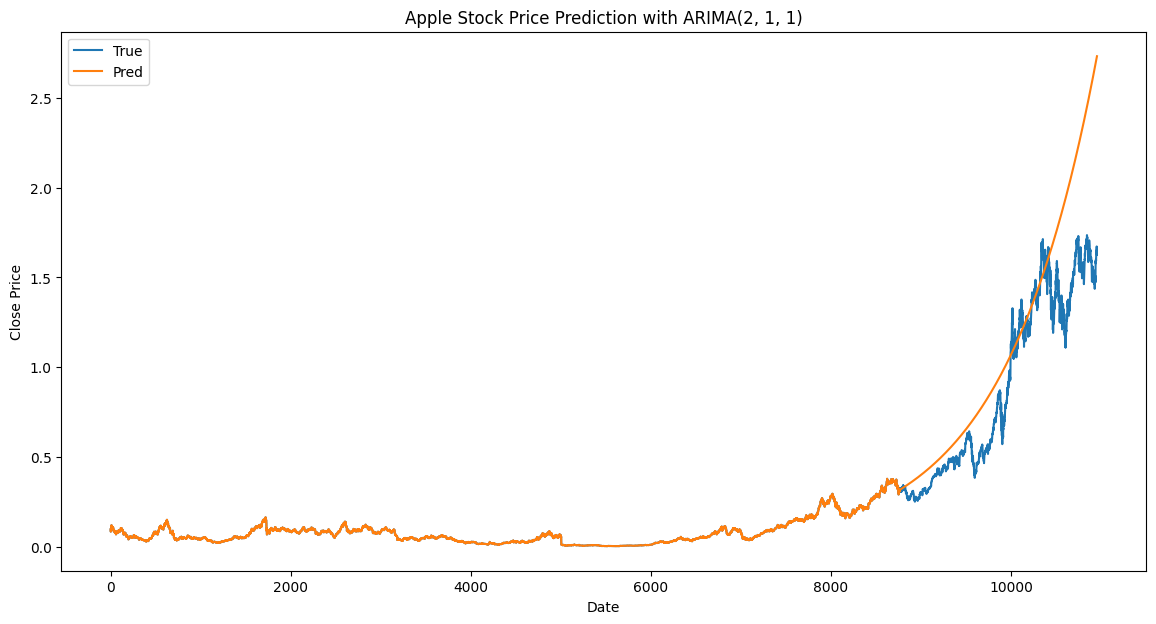

Best ARIMA Configuration: (2, 1, 1)
Root Mean Squared Error: 0.018197610453854426


In [27]:
# Plotting the best model's forecast
forecast_index = test.index
plt.figure(figsize=(14, 7))
plt.plot(original_all.cumprod(), label='True')
plt.plot(forecast_all.cumprod(), label='Pred')
# plt.plot(forecast_index, best_forecast, label='Forecast')
plt.title(f'Apple Stock Price Prediction with ARIMA{best_cfg}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Display the best RMSE and configuration
print(f'Best ARIMA Configuration: {best_cfg}')
print(f'Root Mean Squared Error: {best_score}')